In [11]:
import os
import numpy as np
import librosa
import glob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Configuration
SR = 41000  # Use 41 kHz sample rate
MAX_LENGTH = 240  # Updated for 41 kHz, 3-second audio
HOP_LENGTH = 512  # Default librosa value
AUDIO_PATH= "C:\\Users\\New Classic\\Desktop\\AI and ML\\Data Set\\Preprocessing_02\\3_sec\\Emotion_*\\*.wav"
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=SR, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, hop_length=HOP_LENGTH)
    # Pad/truncate to MAX_LENGTH = 240
    if mfccs.shape[1] > MAX_LENGTH:
        mfccs = mfccs[:, :MAX_LENGTH]
    else:
        pad_width = MAX_LENGTH - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
    return mfccs.T


In [12]:

def load_dataset():
    """Load audio files with preserved temporal structure"""
    features, labels = [], []
    
    for file in glob.glob(AUDIO_PATH):
        # Extract emotion label from filename
        file_name = os.path.basename(file)
        emotion = file_name.split("-")[2]  # Adjust this based on your filename structure
        
        # Extract features
        mfcc_sequence = extract_features(file)
        
        features.append(mfcc_sequence)
        labels.append(emotion)
    
    # Convert to numpy arrays
    X = np.array(features)
    y = np.array(labels)
    return X, y


In [ ]:
# Usage
X, y = load_dataset()

Features shape: (749, 240, 40)
Labels shape: (749,)


In [15]:

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (749, 240, 40)
Labels shape: (749,)


In [14]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [16]:
import numpy as np

# Assuming:
# X = features (shape: num_samples × 126 × 40)
# y = labels (shape: num_samples)

# Save features and labels of selected audios.
np.save("Selected_Audios_features_41k.npy", X)  # Preserves 3D structure
np.save("Selected_Audios_labels_41k.npy", y)

In [17]:
X_loaded = np.load("X_features_at_41K_5_emotions.npy")
y_loaded = np.load("y_labels_at_41K_5_emotions.npy")
y_loaded

array(['01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       '01', '01', '01', '01', '01', '01', '01', '0

In [22]:
import numpy as np

# Load the saved NumPy file
labels_array = np.load("C:\\xampp\\htdocs\\Project Work\\Selected_Audios_labels_41k.npy", allow_pickle=True)

# Get the total count of labels
num_labels = len(labels_array)
print(f"Total number of labels: {num_labels}")

# Extract and display unique labels
unique_labels = set(label[1] for label in labels_array)  # Assuming (filename, label) format
print(f"Unique labels: {unique_labels}")


Total number of labels: 749
Unique labels: {'5', '4', '1', '3', '2'}


In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, {y_train.shape}")
print(f"Validation Shape: {X_val.shape}, {y_val.shape}")



Train Shape: (599, 240, 40), (599,)
Validation Shape: (150, 240, 40), (150,)


In [24]:
from sklearn.preprocessing import LabelEncoder

# Suppose y_train contains your labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # This fits the encoder

# Now le.classes_ is available
print(le.classes_)


['01' '02' '03' '04' '05']


In [25]:
num_classes = len(le.classes_)  

In [26]:
# Split data into train/validation using ONE-HOT ENCODED LABELS
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,  # Input features (shape: num_samples, 240, 40)
    y_categorical,  # One-hot encoded labels
    test_size=0.2,
    random_state=42
)

In [27]:
import numpy as np

# Assuming X_val and y_val are already defined
np.save("Selected_X_val.npy", X_val)
np.save("Selected_y_val.npy", y_val)
np.save("Selected_X_train.npy", X_train)
np.save("Selected_y_train.npy", y_train)

print("Validation data saved successfully!")


Validation data saved successfully!


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Reshape

# Define CNN-LSTM Model
Model = Sequential([
    # CNN Layers (Feature Extraction)
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(240, 40)),  # Corrected input shape
    MaxPooling1D(pool_size=2),
    BatchNormalization(),

    Conv1D(filters=128, kernel_size=3, activation="relu"),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),

    # Reshape CNN output to match LSTM expected input shape
    Reshape((-1, 128)),  # Ensure compatibility with LSTM input

    # LSTM Layers (Temporal Modeling)
    Bidirectional(LSTM(128, return_sequences=True, activation="tanh")),
    Dropout(0.3),

    Bidirectional(LSTM(64, return_sequences=False, activation="tanh")),
    Dropout(0.3),

    # Fully Connected Layers
    Dense(32, activation="relu"),
    Dropout(0.2),

    Dense(5, activation="softmax")  # Output layer for 5 emotion classes
])

# Compile Model
Model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Model successfully built with correct input-output configuration!")


Model successfully built with correct input-output configuration!


In [31]:
Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 238, 64)        │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 119, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 119, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 117, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 58, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 58, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 58, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 58, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 58, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,029 (1.77 MB)

 Trainable params: 464,645 (1.77 MB)

 Non-trainable params: 384 (1.50 KB)

In [32]:

# Train Model
Model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=32)


Epoch 1/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.4090 - loss: 1.4851 - val_accuracy: 0.2000 - val_loss: 1.8041
Epoch 2/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.6494 - loss: 0.9792 - val_accuracy: 0.2067 - val_loss: 2.1125
Epoch 3/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.7550 - loss: 0.7224 - val_accuracy: 0.2400 - val_loss: 2.1949
Epoch 4/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.7813 - loss: 0.6170 - val_accuracy: 0.4067 - val_loss: 1.6449
Epoch 5/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.8182 - loss: 0.5522 - val_accuracy: 0.2533 - val_loss: 2.0280
Epoch 6/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.8407 - loss: 0.4644 - val_accuracy: 0.5267 - val_loss: 1.3298
Epoch 7/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.8617 - loss: 0.3855 - val_accuracy: 0.5667 - val_loss: 1.1391
Epoch 8/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.8619 - loss: 0.3844 - val_accuracy: 0.6333 - 

In [33]:
import tensorflow as tf

# Set initial best validation accuracy (uptill now: 64%)
best_val_accuracy = 0.63 

# Custom Callback to Track Best Validation Accuracy
class BestValAccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        global best_val_accuracy
        val_acc = logs.get("val_accuracy")
        if val_acc and val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            self.model.save("best_model.h5")  # Save model with best val_accuracy
            print(f"New Best Model Saved! Validation Accuracy: {best_val_accuracy:.2f}")

# Train Model with the Callback
Model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=7, batch_size=32, 
    callbacks=[BestValAccuracyCallback()]
)

print(f"Training complete. Best validation accuracy achieved: {best_val_accuracy:.2f}")


Epoch 1/7
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9345 - loss: 0.2756

New Best Model Saved! Validation Accuracy: 0.67
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.9329 - loss: 0.2785 - val_accuracy: 0.6667 - val_loss: 0.8581
Epoch 2/7
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.9032 - loss: 0.2863 - val_accuracy: 0.6467 - val_loss: 1.1648
Epoch 3/7
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.9361 - loss: 0.2081

New Best Model Saved! Validation Accuracy: 0.73
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.9363 - loss: 0.2074 - val_accuracy: 0.7267 - val_loss: 1.0217
Epoch 4/7
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9419 - loss: 0.1741

New Best Model Saved! Validation Accuracy: 0.76
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.9428 - loss: 0.1721 - val_accuracy: 0.7600 - val_loss: 0.7738
Epoch 5/7
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9815 - loss: 0.1101

New Best Model Saved! Validation Accuracy: 0.81
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9807 - loss: 0.1119 - val_accuracy: 0.8067 - val_loss: 0.7432
Epoch 6/7
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9731 - loss: 0.1316 - val_accuracy: 0.7800 - val_loss: 0.7312
Epoch 7/7
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.9757 - loss: 0.0901 - val_accuracy: 0.8067 - val_loss: 0.6485
Training complete. Best validation accuracy achieved: 0.81


In [34]:

print(f"Training complete. Best validation accuracy achieved: {best_val_accuracy:.2f}")

Training complete. Best validation accuracy achieved: 0.81


In [35]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, f1_score

# Load test dataset (assuming MFCCs are preprocessed)
test_X = np.load("Selected_X_val.npy")
test_y = np.load("Selected_y_val.npy")

# Load the trained model
test_model = tf.keras.models.load_model("best_model.h5")

# Get predictions
y_pred = test_model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(test_y, axis=1)  # Convert one-hot labels to class labels

# Calculate F1-Score
f1 = f1_score(y_true_classes, y_pred_classes, average="weighted")
print(f"F1-Score (Weighted): {f1:.2f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step
F1-Score (Weighted): 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.66      0.87      0.75        31
           2       0.96      0.75      0.84        36
           3       0.87      0.62      0.72        21
           4       0.78      0.83      0.81        30

    accuracy                           0.81       150
   macro avg       0.82      0.80      0.80       150
weighted avg       0.83      0.81      0.81       150



In [57]:
def predict_emotion(file_path):
    # Preprocess the new audio (same steps as training)
    mfcc_sequence = extract_features(file_path)  # Shape: (126, 40)
    
    # Add batch dimension: (1, 126, 40) for model input
    mfcc_batch = np.expand_dims(mfcc_sequence, axis=0)
    
    # Predict probabilities
    predictions = Model.predict(mfcc_batch)
    
    # Get the emotion label
    predicted_class_idx = np.argmax(predictions[0])
    emotion_label = le.classes_[predicted_class_idx]
    
    return emotion_label
file_path="C:\\Users\\New Classic\\Desktop\\AI and ML\\Data Set\\Preprocessing_02\\3_sec\\Emotion_04\\Emotion-Neutral-04-105.wav"

file_path="C:\\Users\\New Classic\\Desktop\\AI and ML\\Data Set\\Preprocessing_02\\3_sec\\Emotion_02\\Emotion-Sad-02-105.wav"
#file_path="C:\\Users\\New Classic\\Desktop\\AI and ML\\Data Set\\Preprocessing_02\\3_sec\\Emotion_03\\Emotion-Happy-03-105.wav"
#file_path="C:\\Users\\New Classic\\Desktop\\AI and ML\\Data Set\\Preprocessing_02\\3_sec\\Emotion_01\\Emotion-Angry-01-126.wav"
#file_path="C:\\Users\\New Classic\\Desktop\\AI and ML\\Data Set\\Preprocessing_02\\3_sec\\Emotion_05\\Emotion-Fear-05-115.wav"
predicted_emotion = predict_emotion(file_path)
print(f"Predicted emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted emotion: 02


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step


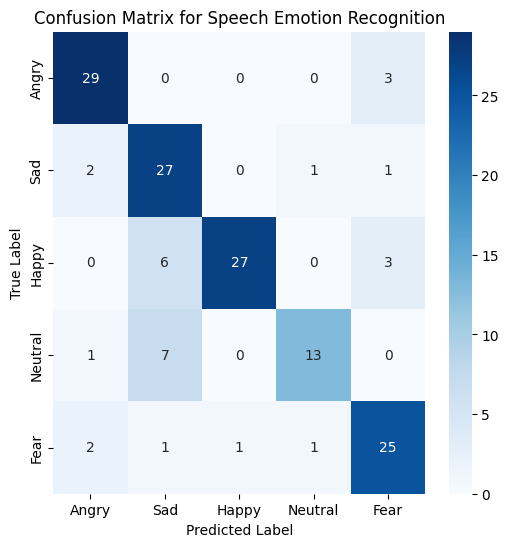

In [50]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Load test dataset (assuming MFCCs are preprocessed)
test_X = np.load("Selected_X_val.npy")
test_y = np.load("Selected_y_val.npy")

# Load the trained model
test_model = tf.keras.models.load_model("best_model.h5")

# Get predictions
y_pred = test_model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(test_y, axis=1)  # Convert one-hot encoded labels to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Angry", "Sad", "Happy", "Neutral", "Fear"], 
            yticklabels=["Angry", "Sad", "Happy", "Neutral", "Fear"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Speech Emotion Recognition")
plt.show()
